### CD4 Cropseq Dataset Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy.api as sc
import scipy as sp
import itertools
import numpy as np
import scipy.stats as stats
from scipy.integrate import dblquad
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import imp
pd.options.display.max_rows = 999
pd.set_option('display.max_colwidth', -1)
import pickle as pkl
import time

In [13]:
import sys
sys.path.append('/wynton/group/ye/mincheol/Github/scrna-parameter-estimation/simplesc')
import scme, utils

In [3]:
data_path = '/wynton/group/ye/mincheol/parameter_estimation/'

In [4]:
with open(data_path + 'interferon_data/immune_genes.pkl', 'rb') as f:
    immune_genes = pkl.load(f)

In [7]:
with open(data_path + 'cd4_cropseq_data/genes_to_test.pkl', 'rb') as f:
    genes_to_test = pkl.load(f)

In [19]:
genes_to_test

['FOXP1',
 'STAT6',
 'JUN',
 'NCOA4',
 'STAT3',
 'NCOA3',
 'JUNB',
 'IRF4',
 'STAT1',
 'BATF',
 'IRF8',
 'IFI16',
 'IRF2',
 'ETS1',
 'IRF1',
 'STAT5A',
 'SATB1']

### Read the AnnData object

In [10]:
adata = sc.read(data_path + 'cd4_cropseq_data/guide_singlets.h5ad')

### For each group, compare the KO gene with the downstream genes

In [23]:
test_guides = ['WT', 'FUBP1.77964146', 'ZNF706.101201657']
adata = adata[adata.obs.group.isin(test_guides)]

In [24]:
adata.shape

(10466, 562)

In [25]:
estimator = scme.SingleCellEstimator(
    adata=adata, 
    group_label='group',
    n_umis_column='n_counts',
    num_permute=10000,
    beta=0.1)

In [26]:
estimator.estimate_beta_sq(tolerance=3)

Computing observed moments for: ZNF706.101201657
Computing observed moments for: WT
Computing observed moments for: FUBP1.77964146


/wynton/group/ye/mincheol/Github/scrna-parameter-estimation/simplesc/scme.py:245: RuntimeWarning: invalid value encountered in true_divide
  (y/x**2 - 1/x)[y > x],
/wynton/group/ye/mincheol/Github/scrna-parameter-estimation/simplesc/scme.py:245: RuntimeWarning: divide by zero encountered in true_divide
  (y/x**2 - 1/x)[y > x],
/wynton/group/ye/mincheol/Github/scrna-parameter-estimation/simplesc/scme.py:250: RuntimeWarning: invalid value encountered in true_divide
  self.all_group_obs_cv_sq = y/x**2


In [28]:
%matplotlib inline

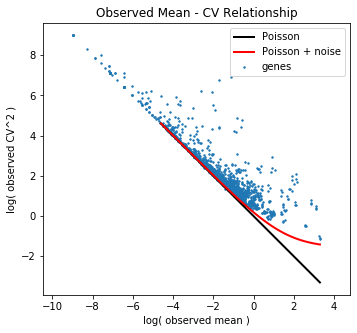

In [29]:
estimator.plot_cv_mean_curve()

In [ ]:
for group in adata.groups.drop_duplicates()[:2]:
    group

In [22]:
['WT', 'FUBP1.77964146', 'ZNF706.101201657', 'RFX2.6026185', 'VDR.47855738']

['WT', 'FUBP1.77964146', 'ZNF706.101201657', 'RFX2.6026185', 'VDR.47855738']

In [21]:
adata.obs.group.value_counts().index[:5]

CategoricalIndex(['WT', 'FUBP1.77964146', 'ZNF706.101201657', 'RFX2.6026185',
                  'VDR.47855738'],
                 categories=['ARID5A.96550280', 'ARID5A.96551631', 'ARID5B.61902410', 'ARID5B.62050979', 'ASCC1.72196949', 'ASCC1.72210803', 'ATF3.212615059', 'ATF3.212615192', ...], ordered=False, dtype='category')

In [11]:
adata.obs.head(5)

,concat_index,donor,multiplet,well,guide1_cov,guide2_cov,guide3_cov,guide4_cov,guide1_ce_cov,guide2_ce_cov,guide3_ce_cov,guide4_ce_cov,guide_multiplet_cov,group,n_counts
index,,,,,,,,,,,,,,,
CTTTGCGGTCAACATC-8,0,IGTB1982,SNG,8,RC3H1.173961818.CTGGATTCTGGTACATACGA,nan,nan,nan,0.154435,NaN,NaN,NaN,1,RC3H1.173961818,3027
TGGCGCAAGGATGCGT-6,0,IGTB1762,SNG,6,MAFK.1540041.CCTGCGGGGTCTCACCAAGG,nan,nan,nan,0.005697,NaN,NaN,NaN,1,MAFK.1540041,6495
CGAGCACGTAGAGCTG-7,0,IGTB2065,SNG,7,SRA1.140551987.AGACTGCCGTGGCCACACAA,nan,nan,nan,0.109404,NaN,NaN,NaN,1,SRA1.140551987,4386
TGCCCATAGAGTGACC-10,0,IGTB1762,SNG,10,ZNF706.101201657.GAAACAAGGACATGACCAAA,nan,nan,nan,0.146234,NaN,NaN,NaN,1,ZNF706.101201657,5517
TGGACGCAGAACAATC-7,0,IGTB884,SNG,7,TFB2M.246556688.GTTGGAATGTTCCCAAGTAG,nan,nan,nan,0.119784,NaN,NaN,NaN,1,TFB2M.246556688,7523


### Select relevant cells and save the AnnData object

In [3]:
adata = sc.read('/wynton/group/ye/rgate/072319_tfko_140_seq/tfko.sng.guides.h5ad')

Only considering the two last: ['.guides', '.h5ad'].
Only considering the two last: ['.guides', '.h5ad'].


In [30]:
df = pd.read_csv(
    '/wynton/group/ye/rgate/072319_tfko_140_seq/tfko.sng.guides.combat.n50.res1.meta.txt', 
    sep='\t',
    index_col=0)

In [31]:
df_singlet = df.query('guide_multiplet_cov == "1"').copy()

In [32]:
df_singlet['group'] = df_singlet.apply(lambda row: '.'.join(row['guide1_cov'].split('.')[:-1]) if row['WT'] == 'F' else 'WT', axis=1)

In [34]:
adata_singlets = adata[df_singlet.index].copy()
adata_singlets.obs['group'] = df_singlet['group']

In [47]:
ko_genes = list(set([x.split('.')[0] for x in adata_singlets.obs.guide1_cov.drop_duplicates().tolist()]))

In [42]:
genes = list(set(ko_genes) | set(immune_genes))

In [43]:
adata_singlets = adata_singlets[:, genes].copy()

In [44]:
adata_singlets.shape

(105203, 562)

In [53]:
sc.write(data_path + 'cd4_cropseq_data/guide_singlets.h5ad', adata_singlets)

... storing 'group' as categorical


### Get a list of genes to test correlations against

In [57]:
prefixes = ['STAT', 'IRF', 'IFI', 'ETS', 'NCOA', 'JUN', 'BATF', 'SATB1', 'FOXP']
genes_to_test = []
for gene in ko_genes:
    for prefix in prefixes:
        if prefix in gene:
            genes_to_test.append(gene)

In [59]:
with open(data_path + 'cd4_cropseq_data/genes_to_test.pkl', 'wb') as f:
    pkl.dump(genes_to_test, f)